<a href="https://colab.research.google.com/github/aratatokyo/spotify_dataset_trial/blob/main/sportify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 参考
## https://qiita.com/katsu1110/items/a8d508a1b6f07bd3a243

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"keisukeshinohara","key":"59af5be87b455e04cbc00fc275cbc806"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [5]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [6]:
!pip install kaggle


In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-160k-tracks

 52% 9.00M/17.4M [00:00<00:00, 37.1MB/s]
100% 17.4M/17.4M [00:00<00:00, 58.1MB/s]


# zipから解答
## http://tsukiblog.net/?p=641


In [7]:
!unzip "/content/spotify-dataset-19212020-160k-tracks.zip"

Archive:  /content/spotify-dataset-19212020-160k-tracks.zip
  inflating: data.csv                
  inflating: data_by_artist.csv      
  inflating: data_by_genres.csv      
  inflating: data_by_year.csv        
  inflating: data_w_genres.csv       


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
data = pd.read_csv("/content/data.csv")

FileNotFoundError: ignored

In [4]:
data.describe()

NameError: ignored

# 参考になるnotebook
## https://www.kaggle.com/darkstardream/spotify-analysis-starman

# 考察
・ジャンルは存在する、ジャンルと各パラメターの値の相関は確認したい→ここはさくっとgenreで可視化  
・自分に合ったアーティスト、曲のレコメンドをして欲しい。→好きな曲をピックアップして、そのパラメターをカテゴライズする。自分の中の好きな曲のジャンルがわかる→何曲選ぶか。。

In [15]:
genre = pd.read_csv("/content/data_by_genres.csv")

In [50]:
genre.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1


In [16]:
genre.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,3232.000000,3232.000000,3.232000e+03,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,0.368161,0.540810,2.614567e+05,0.583474,0.254888,0.204010,-10.396208,0.084999,119.707549,0.483757,29.701618,5.942450,0.819926
std,0.319697,0.149353,1.255810e+05,0.232931,0.283907,0.103440,5.024042,0.081157,17.333590,0.200382,18.415394,3.342851,0.384309
min,0.000001,0.063200,3.094600e+04,0.000953,0.000000,0.016500,-40.637000,0.024300,61.364269,0.019285,0.000000,0.000000,0.000000
25%,0.082914,0.450250,2.068497e+05,0.419648,0.013383,0.142317,-12.212486,0.046431,109.480352,0.341571,15.190070,3.000000,1.000000
50%,0.280119,0.550334,2.418786e+05,0.622982,0.128343,0.185618,-9.097583,0.060769,120.142000,0.488364,32.181281,7.000000,1.000000
75%,0.629265,0.645470,2.873741e+05,0.756599,0.443383,0.233807,-7.038634,0.091795,128.253833,0.626171,43.069058,9.000000,1.000000
max,0.996000,0.940000,3.478338e+06,0.999000,0.984000,0.944000,-0.862000,0.956000,211.968000,0.997000,79.000000,11.000000,1.000000


・3000を超えるジャンルが存在。。  
・好きなアーティストをpick upして、そのジャンルを確認

In [23]:
w_genre = pd.read_csv("data_w_genres.csv" )

In [69]:
w_genre.head(2)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.0,0.376203,0.010261,0.283050,-14.4343,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.0,0.406808,0.081158,0.315215,-10.6900,0.176212,103.044154,0.268865,31.538462,5,1,26,[]


In [32]:
w_genre[w_genre['artists'].str.contains('Beatles')].head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
27812,The Beatles,0.359416,0.522841,174328.818622,0.550951,0.051673,0.223441,-9.634748,0.053343,121.691207,0.623417,46.371221,0,1,827,"['beatlesque', 'british invasion', 'classic ro..."


In [37]:
w_genre[w_genre['artists'].str.contains('Beatles')]['genres'].values

array(["['beatlesque', 'british invasion', 'classic rock', 'merseybeat', 'psychedelic rock', 'rock']"],
      dtype=object)

・曲まで指定するのは手間なので、今回は一部を抽出することに

In [40]:
w_genre[w_genre['artists'].str.contains('Red Hot Chili Peppers')].head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
23474,Red Hot Chili Peppers,0.046795,0.551488,244306.738095,0.818286,0.073462,0.179633,-5.761917,0.07655,115.787006,0.50911,47.744048,0,1,336,"['alternative rock', 'funk metal', 'funk rock'..."


In [38]:
w_genre[w_genre['artists'].str.contains('Red Hot')]['genres'].values

array(["['big band']",
       "['alternative rock', 'funk metal', 'funk rock', 'permanent wave', 'rock']"],
      dtype=object)

In [42]:
w_genre[w_genre['artists'].str.contains('Nirvana')].head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
20852,Nirvana,0.100228,0.422727,209237.034091,0.777477,0.120109,0.191686,-8.187722,0.061487,134.333795,0.448493,44.511364,1,1,352,"['alternative rock', 'grunge', 'permanent wave..."


In [43]:
w_genre[w_genre['artists'].str.contains('Nirvana')]['genres'].values

array(["['alternative rock', 'grunge', 'permanent wave', 'rock']"],
      dtype=object)

In [68]:
# japanese・・・というgenreがあることに気づく
w_genre[w_genre['genres'].str.contains('japanese')].head(2)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
264,AAA,0.024215,0.628000,269366.500000,0.855000,0.000000,0.360500,-5.223500,0.080050,135.9975,0.770,30.500000,7,1,4,"['japanese alternative rock', 'japanese electr..."
309,ASIAN KUNG-FU GENERATION,0.000531,0.429167,226842.333333,0.917667,0.112867,0.112667,-4.071333,0.063433,156.0245,0.526,54.333333,4,1,12,"['anime', 'anime score', 'j-pop', 'j-poprock',..."


In [93]:
w_genre[w_genre['genres'].str.contains('j-poprock')].head(100)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
309,ASIAN KUNG-FU GENERATION,0.000531,0.429167,226842.333333,0.917667,0.112867,0.112667,-4.071333,0.063433,156.024500,0.526000,54.333333,4,1,12,"['anime', 'anime score', 'j-pop', 'j-poprock',..."
1865,Aqua Timez,0.000482,0.506500,270553.000000,0.936000,0.000000,0.221500,-4.049000,0.058250,114.878500,0.525000,53.500000,7,1,4,"['anime', 'j-pop', 'j-poprock', 'j-rock']"
2141,Asia,0.172587,0.358533,281324.466667,0.780000,0.000237,0.225353,-8.781800,0.055820,127.092933,0.411333,36.800000,0,0,30,"['anime', 'anime score', 'j-pop', 'j-poprock',..."
2416,BRADIO,0.016700,0.450000,210084.000000,0.857000,0.000000,0.202000,-2.350000,0.039800,139.064000,0.755000,63.000000,6,1,2,"['anime latino', 'j-poprock', 'otacore']"
2426,BURNOUT SYNDROMES,0.012250,0.394000,244640.000000,0.950000,0.000000,0.347000,-1.587000,0.101350,136.371000,0.351000,66.000000,11,1,4,"['anime rock', 'j-poprock', 'otacore']"
4206,CHEMISTRY,0.004870,0.385000,215040.000000,0.912000,0.000011,0.092600,-4.198000,0.105000,127.038000,0.312000,56.000000,1,0,2,"['j-pop', 'j-poprock']"
7546,Do As Infinity,0.032700,0.377000,249900.000000,0.731500,0.000257,0.099850,-4.409000,0.034900,158.369500,0.388500,47.500000,10,1,4,"['anime', 'j-pop', 'j-poprock']"
9201,FUNKIST,0.005716,0.441000,214233.500000,0.884500,0.000000,0.195000,-4.113000,0.047000,102.497500,0.680000,57.500000,1,0,4,['j-poprock']
9355,"Fear, and Loathing in Las Vegas",0.000788,0.266000,222060.000000,0.987500,0.000001,0.205000,-0.131500,0.182000,187.606500,0.435000,62.500000,6,0,4,"['j-metal', 'j-poprock', 'j-rock', 'japanese m..."
10975,Goose house,0.391000,0.491000,254133.000000,0.879000,0.000000,0.341000,-2.722000,0.065200,160.092000,0.571000,59.000000,6,0,2,['j-poprock']


ここは決めで、以下ジャンルで可視化してみる  
・rock  
・j-rock  
・alternative rock  

In [63]:
genre_pickup = genre[(genre['genres'] == 'rock') | (genre['genres'] == 'j-rock') | (genre['genres'] == 'alternative rock') | (genre['genres'] == 'anime score')]

In [64]:
genre_pickup.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
65,alternative rock,0.151137,0.476421,244563.446764,0.714645,0.179047,0.192964,-8.294449,0.057739,125.595160,0.498318,40.754842,7,1
103,anime score,0.327248,0.526965,215883.220743,0.643203,0.278874,0.205817,-8.916126,0.096367,124.259024,0.497530,40.158996,7,1
1618,j-rock,0.067003,0.512806,271394.675556,0.846453,0.188371,0.242855,-4.997464,0.076984,132.500894,0.516408,39.711389,0,1
2546,rock,0.160153,0.503948,249724.257208,0.707018,0.101601,0.211169,-8.169173,0.065831,124.709260,0.510827,42.365989,9,1


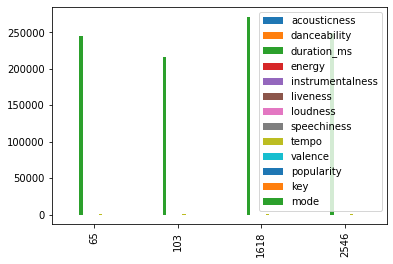

In [65]:
#うまくいかない
genre_pickup.plot(kind='bar')

In [166]:
#もはやBarに表示するくらいでいいのではないか
## https://qiita.com/hrappuccino/items/16c20645c60578391017
genre_pickup.style.bar()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
65,alternative rock,0.151137,0.476421,244563.446764,0.714645,0.179047,0.192964,-8.294449,0.057739,125.595160,0.498318,40.754842,7,1
103,anime score,0.327248,0.526965,215883.220743,0.643203,0.278874,0.205817,-8.916126,0.096367,124.259024,0.497530,40.158996,7,1
1618,j-rock,0.067003,0.512806,271394.675556,0.846453,0.188371,0.242855,-4.997464,0.076984,132.500894,0.516408,39.711389,0,1
2546,rock,0.160153,0.503948,249724.257208,0.707018,0.101601,0.211169,-8.169173,0.065831,124.709260,0.510827,42.365989,9,1


・オルタナは一番のものがない。いろんなジャンルが入りすぎて、平均的なジャンルになったかも  
・アニメはacousticess, danceability, instrument, speechnessが一番。感覚的にはわかる。結構打ち込み中心で楽器が強い曲多いかも  
・j-rockについてはenergy,liveness,loudness,tempo,valenceが一番。明るい曲は比較的多いか
・rockは人気！

# ここからは好きな曲をpickup

In [70]:
data = pd.read_csv("/content/data.csv")

In [71]:
data.head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.950,1920


In [75]:
# removing waste stuff(square bracket and quotation marks) from artist's name 
data['artists'] = data['artists'].apply(lambda x: x[1:-1].replace("'", ''))
# correcting data types 
data['release_date'] = pd.to_datetime(data['release_date'])
# spotify['year'] = pd.to_datetime(spotify['year'].apply(lambda x: str(x)+'-01-01'))

In [106]:
id_list = [
           '5ZBeML7Lf3FMEVviTyvi8l',#Twist And Shout
           '3VbGCXWRiouAq8VyMYN2MI',#Love Me Do
           '5ghIJDpPoe3CfHMGu71E6T',#Smells Like Teen Spirit
           '4P5KoWXOxwuobLmHXLMobV',#Come As You Are
           '64BbK9SFKH2jk86U3dGj2P',#Otherside
           '1f2V8U1BiWaC9aJWmpOARe',#By the Way
           '1VKr8751CzE7DB4AuEmS3V',#アフターダーク
           '6nTiIhLmQ3FWhvrGafw2zj',#American Idiot	
           '305WCRhhS10XUcH6AEwZk6',#Are you gonna be my girl
           '0CFtlafteObzOEuJdESQkb'#Eat The Rich
           ]

In [105]:
data[(data['artists'].str.contains('Aerosmith'))].head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
10463,0.3880,Aerosmith,0.307,266960,0.433,0,5MxNLUsfh7uzROypsoO5qe,0.000091,1,0.332,-10.057,1,Dream On,78,1973-01-05,0.029,160.900,0.224,1973
10742,0.0672,Aerosmith,0.565,233160,0.628,0,2ATTIE0sKIXysApJPlR3sB,0.000181,9,0.390,-10.368,1,Same Old Song and Dance,53,1974-03-15,0.033,133.194,0.706,1974


In [125]:
song_list = data[(data['id'].str.contains('xxxx'))]
for x in id_list:
  print(x)
  song_list = song_list.append(data[(data['id'] == x)])

5ZBeML7Lf3FMEVviTyvi8l
3VbGCXWRiouAq8VyMYN2MI
5ghIJDpPoe3CfHMGu71E6T
4P5KoWXOxwuobLmHXLMobV
64BbK9SFKH2jk86U3dGj2P
1f2V8U1BiWaC9aJWmpOARe
1VKr8751CzE7DB4AuEmS3V
6nTiIhLmQ3FWhvrGafw2zj
305WCRhhS10XUcH6AEwZk6
0CFtlafteObzOEuJdESQkb


In [126]:
song_list

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
8467,0.641000,The Beatles,0.482,155227,0.849,0,5ZBeML7Lf3FMEVviTyvi8l,0.000008,2,0.0414,-9.198,1,Twist And Shout - Remastered 2009,73,1963-03-22,0.0452,124.631,0.937,1963
8477,0.386000,The Beatles,0.520,141693,0.829,0,3VbGCXWRiouAq8VyMYN2MI,0.000062,0,0.2270,-6.228,1,Love Me Do - Remastered 2009,67,1963-03-22,0.0806,147.997,0.744,1963
14062,0.000025,Nirvana,0.502,301920,0.912,0,5ghIJDpPoe3CfHMGu71E6T,0.000173,1,0.1060,-4.556,1,Smells Like Teen Spirit,76,1991-09-26,0.0564,116.761,0.720,1991
14064,0.000160,Nirvana,0.500,218920,0.824,0,4P5KoWXOxwuobLmHXLMobV,0.001610,4,0.0916,-5.846,0,Come As You Are,73,1991-09-26,0.0388,120.125,0.539,1991
15676,0.003160,Red Hot Chili Peppers,0.458,255373,0.795,0,64BbK9SFKH2jk86U3dGj2P,0.000202,0,0.0756,-3.265,1,Otherside,78,1999-06-08,0.0574,123.229,0.513,1999
16306,0.026400,Red Hot Chili Peppers,0.451,216933,0.970,0,1f2V8U1BiWaC9aJWmpOARe,0.003550,0,0.1020,-4.938,1,By the Way,73,2002-07-09,0.1070,122.444,0.198,2002
140663,0.002300,ASIAN KUNG-FU GENERATION,0.392,192027,0.948,0,1VKr8751CzE7DB4AuEmS3V,0.000000,1,0.0653,-3.707,1,アフターダーク,52,2008-03-05,0.0456,190.937,0.593,2008
16672,0.000026,Green Day,0.380,176346,0.988,1,6nTiIhLmQ3FWhvrGafw2zj,0.000079,1,0.3680,-2.042,1,American Idiot,78,2004-09-21,0.0639,186.113,0.769,2004
16498,0.001480,Jet,0.613,213800,0.953,0,305WCRhhS10XUcH6AEwZk6,0.000582,2,0.1520,-3.435,1,Are You Gonna Be My Girl,74,2003-09-15,0.0855,105.046,0.537,2003
34101,0.006870,Aerosmith,0.569,249707,0.930,0,0CFtlafteObzOEuJdESQkb,0.000143,11,0.3700,-4.637,0,Eat The Rich,53,1993-01-01,0.0525,122.957,0.696,1993


In [167]:
# 主成分
## https://qiita.com/maskot1977/items/082557fcda78c4cdb41f

In [127]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [130]:
drop_col = ['artists', 'id','name','release_date']
songpca = song_list.drop(drop_col, axis=1)

In [131]:
songpca_r = songpca.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
songpca_r.head()

,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
8467,-0.065234,-1.171004,-0.732865,-0.316228,-0.559389,-0.060120,-0.974593,-2.218782,0.474342,0.344028,-0.843207,-0.384547,1.567798,-1.774560
8477,0.462193,-1.449204,-1.021395,-0.316228,-0.511446,-0.661324,0.551987,-0.725448,0.474342,-0.281477,0.806850,0.404124,0.599216,-1.774560
14062,0.212359,1.844361,0.176003,-0.316228,-0.413369,-0.360722,-0.443251,0.115243,0.474342,0.656781,-0.321155,-0.650183,0.478770,-0.043282
14064,0.184599,0.138245,-1.093527,-0.316228,0.856336,0.541083,-0.561693,-0.533377,-1.897367,0.344028,-1.141523,-0.536638,-0.429589,-0.043282
15676,-0.398346,0.887558,-1.511895,-0.316228,-0.387745,-0.661324,-0.693295,0.764366,0.474342,0.865283,-0.274543,-0.431869,-0.560071,0.451369


In [133]:
#主成分分析の実行
pca = PCA()
pca.fit(songpca_r)
# データを主成分空間に写像
feature = pca.transform(songpca_r)

In [145]:
#pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(songpca_r.columns))]).head()

In [148]:
df = pd.DataFrame(feature)

In [156]:
df['name'] = song_list['name'].values

In [157]:
df

,0,1,2,3,4,5,6,7,8,9,name
0,-2.571315,-1.277799,-2.316136,-0.335363,0.233467,0.222070,-1.028265,0.208680,0.291814,2.388355e-16,Twist And Shout - Remastered 2009
1,-1.140652,-0.963986,-1.690854,-1.607372,0.449072,-0.471554,1.135971,-0.401173,-0.255422,1.555687e-16,Love Me Do - Remastered 2009
2,-0.340955,0.627574,-0.061219,0.966792,-1.522420,-0.664080,-0.854107,-0.662517,-0.355096,-3.963189e-16,Smells Like Teen Spirit
3,-1.665372,0.647406,0.707446,0.889048,0.269825,1.864093,0.268304,0.520838,-0.310644,1.588205e-15,Come As You Are
4,0.039612,0.943130,-0.763569,1.628605,-1.163790,0.037996,1.027467,-0.195180,0.402238,-3.531825e-16,Otherside
5,1.845429,3.394678,-0.354673,-0.952847,1.319366,0.569977,-0.379073,-0.410124,0.104524,-1.370617e-15,By the Way
6,1.479500,-1.315426,-0.008838,1.799411,2.058838,-1.081658,-0.031839,0.216487,-0.071924,-1.198918e-15,アフターダーク
7,3.652203,-2.604446,-0.004892,-0.710944,-1.004088,0.969357,-0.142059,0.075378,0.012708,9.581952e-16,American Idiot
8,0.279249,1.577341,0.579983,-1.025172,-0.934292,-1.272993,0.020374,1.029225,-0.022298,1.598273e-15,Are You Gonna Be My Girl
9,-1.577700,-1.028471,3.912752,-0.652159,0.294022,-0.173208,-0.016775,-0.381614,0.204100,-3.081344e-16,Eat The Rich


In [160]:
x = df[0]
y = df[1]
text = df['name']

In [165]:
# ラベルつき散布図　参考
## https://upura.hatenablog.com/entry/2018/07/05/181500#Python%E3%81%A7%E3%81%AE%E5%AE%9F%E8%A3%85

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_

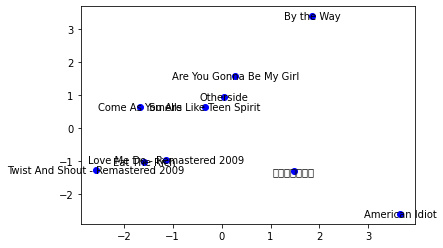

In [164]:
fig, ax = plt.subplots()
plt.plot(x, y, 'bo')
texts = [plt.text(x[i], y[i], text[i], ha='center', va='center') for i in range(len(x))]

In [162]:
from adjustText import adjust_text
fig, ax = plt.subplots()
plt.plot(x, y, 'bo')
texts = [plt.text(x[i], y[i], text[i], ha='center', va='center') for i in range(len(x))]
adjust_text(texts)

ModuleNotFoundError: ignored

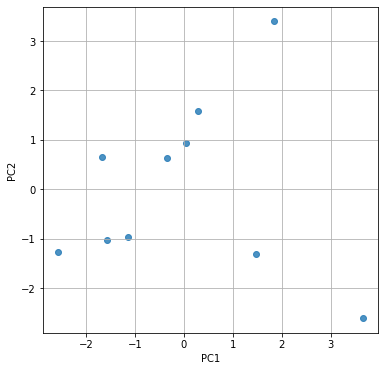

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

予測を作れると良い。レコメンドしたい。  
ある曲を入れた時に、似た曲を返す。（1990'-）  
ベイズの実装を行い、  